### 1. Data Import

In [1344]:
# import animal shelter data set and investigate
% matplotlib inline
import pylab as plt
import pandas as pd
import numpy as np

animaltrain = pd.read_csv('train.csv', header = 0)
animaltest = pd.read_csv('test.csv', header = 0)

In [1345]:
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White


In [1346]:
animaltest.head(3)

,ID,Name,DateTime,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,1,Summer,2015-10-12 12:15:00,Dog,Intact Female,10 months,Labrador Retriever Mix,Red/White
1,2,Cheyenne,2014-07-26 17:59:00,Dog,Spayed Female,2 years,German Shepherd/Siberian Husky,Black/Tan
2,3,Gus,2016-01-13 12:20:00,Cat,Neutered Male,1 year,Domestic Shorthair Mix,Brown Tabby


### 2. Data Exploration and Adaptation

In [1347]:
animaltrain.shape == animaltrain.dropna().shape # there are nan's in the training set

False

In [1348]:
animaltest.shape == animaltest.dropna().shape # there are nan's in the test set

False

In [1349]:
animaltrain[ animaltrain['SexuponOutcome'].isnull()]

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
3174,A667395,Diego,2013-11-27 16:11:00,Return_to_owner,NaN,Dog,NaN,7 years,Dachshund,Brown Merle


In [1350]:
animaltrain[ animaltrain['AgeuponOutcome'].isnull()].head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
2480,A720674,NaN,2016-02-16 10:17:00,Transfer,SCRP,Cat,Intact Male,NaN,Domestic Shorthair Mix,Blue Tabby/White
2912,A720973,NaN,2016-02-18 19:07:00,Transfer,SCRP,Cat,Unknown,NaN,Domestic Shorthair Mix,Gray Tabby
3766,A720820,NaN,2016-02-16 18:55:00,Transfer,SCRP,Cat,Intact Female,NaN,Domestic Shorthair Mix,Brown Tabby


- the nan's are in SexuponOutcome and AgeuponOutcome
- convert everything into numbers

#### 2.1 AnimalTypes

In [1351]:
# find unique animal types
animaltrain['AnimalType'].unique()

array(['Dog', 'Cat'], dtype=object)

In [1352]:
# only cats and dogs. Map animal type to an integer
animaltrain['Type'] = animaltrain['AnimalType'].map({'Dog': 0, 'Cat': 1}).astype(int)
animaltest['Type'] = animaltest['AnimalType'].map({'Dog': 0, 'Cat': 1}).astype(int)
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0


#### 2.2 Animal Sex

In [1353]:
# find unique values for SexuponOutcome
animaltrain['SexuponOutcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female',
       'Unknown', nan], dtype=object)

In [1354]:
# copy to new column 'Sex'
animaltrain['Sex'] = animaltrain['SexuponOutcome']
animaltest['Sex'] = animaltest['SexuponOutcome']

In [1355]:
# if the value is nan, replace with Unknown
animaltrain.loc[animaltrain['SexuponOutcome'].isnull(), 'Sex'] = 'Unknown' 
animaltest.loc[animaltest['SexuponOutcome'].isnull(), 'Sex'] = 'Unknown'

In [1356]:
# map the unique values for SexuponOutcome to integers
animaltrain['Sex'] = animaltrain['Sex'].map({'Neutered Male': 0, 'Spayed Female': 1, 'Intact Male': 2, 'Intact Female': 3, 'Unknown': 4}).astype(int)
animaltest['Sex'] = animaltest['Sex'].map({'Neutered Male': 0, 'Spayed Female': 1, 'Intact Male': 2, 'Intact Female': 4, 'Unknown': 4})

In [1357]:
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,Sex
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0


#### 2.3 Age

In [1358]:
# check for ages
animaltrain['AgeuponOutcome'].unique()

array(['1 year', '2 years', '3 weeks', '1 month', '5 months', '4 years',
       '3 months', '2 weeks', '2 months', '10 months', '6 months',
       '5 years', '7 years', '3 years', '4 months', '12 years', '9 years',
       '6 years', '1 weeks', '11 years', '4 weeks', '7 months', '8 years',
       '11 months', '4 days', '9 months', '8 months', '15 years',
       '10 years', '1 week', '0 years', '14 years', '3 days', '6 days',
       '5 days', '5 weeks', '2 days', '16 years', '1 day', '13 years', nan,
       '17 years', '18 years', '19 years', '20 years'], dtype=object)

In [1359]:
# function for calculating numerical value of ages

def agecalculator(agedf):
    ages = []
    for age in agedf:
        if 'day' in age:
            ages.append(int(age.split(' ')[0]) * 1)
        elif 'week' in age:
            ages.append(int(age.split(' ')[0]) * 7)
        elif 'month' in age:
            ages.append(int(age.split(' ')[0]) * 30)
        elif 'year' in age:
            ages.append(int(age.split(' ')[0]) * 365)
    return np.array(ages)

In [1360]:
# age
animaltrain.loc[animaltrain['AgeuponOutcome'].isnull(), 'AgeuponOutcome'] = '0 days'
trainages = agecalculator(animaltrain['AgeuponOutcome'])

animaltest.loc[animaltest['AgeuponOutcome'].isnull(), 'AgeuponOutcome'] = '0 days'
testages = agecalculator(animaltest['AgeuponOutcome'])

In [1361]:
# calculate mean and standard deviation of training set to scale ages
mean_age = trainages.mean()
std_age = trainages.std()

# scale ages
#trainages = (trainages - mean_age) / std_age
#testages = (testages - mean_age) / std_age

In [1362]:
# function for binning ages
def agebins(agedata):
    agebins = []
    for age in agedata:
        if age <= 15:
            agebins.append(0)
        elif age <= 25:
            agebins.append(1)
        elif age <= 35:
            agebins.append(2)
        elif age <= 50:
            agebins.append(3)
        elif age <= 75:
            agebins.append(4)
        elif age <= 100:
            agebins.append(5)
        elif age <= 200:
            agebins.append(6)
        elif age <= 300:
            agebins.append(7)
        elif age <= 365:
            agebins.append(8)
        elif age <= 700:
            agebins.append(9)
        elif age <= 1000:
            agebins.append(10)
        elif age <= 1600:
            agebins.append(11)
        elif age <= 2500:
            agebins.append(12)
        else:
            agebins.append(13)
    return agebins

In [1363]:
# assign to the dataframes
animaltrain['Age'] = trainages
animaltest['Age'] = testages
animaltrain['Agebin'] = agebins(trainages)
animaltest['Agebin'] = agebins(testages)
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,Sex,Age,Agebin
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,365,8
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,365,8
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0,730,10


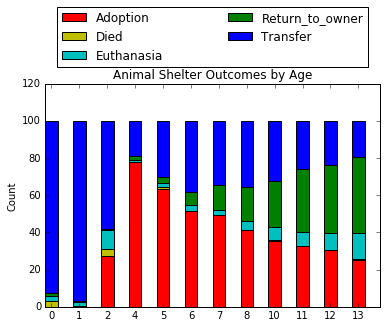

In [1364]:
from operator import add

# plot outcome depending on age
dataArray = {}
for outcome in animaltrain['OutcomeType'].unique():
    dataArray[outcome] = []
    for agecategory in sorted(animaltrain['Agebin'].unique()):
        # for each outcome and time of day add percentage to a list
        dataArray[outcome].append(len(animaltrain.loc[(animaltrain['OutcomeType'] == outcome) & (animaltrain['Agebin'] == agecategory), 'OutcomeType'])/len(animaltrain[animaltrain['Agebin']==agecategory])* 100)    

width = 0.45
ind = np.arange(len(animaltrain['Agebin'].unique()))

# plot in a bar plot
p1 = plt.bar(ind, dataArray['Adoption'], width, color='r', label = 'Adoption')
p2 = plt.bar(ind, dataArray['Died'], width, color='y', bottom=dataArray['Adoption'], label = 'Died')
p3 = plt.bar(ind, dataArray['Euthanasia'], width, color = 'c', bottom=np.array(dataArray['Adoption'])+np.array(dataArray['Died']), label = 'Euthanasia')
p4 = plt.bar(ind, dataArray['Return_to_owner'], width, color='g', bottom=np.array(dataArray['Adoption'])+np.array(dataArray['Died'])+np.array(dataArray['Euthanasia']), label = 'Return_to_owner')
p5 = plt.bar(ind, dataArray['Transfer'], width, color='b', bottom=np.array(dataArray['Adoption'])+np.array(dataArray['Died'])+np.array(dataArray['Euthanasia'])+np.array(dataArray['Return_to_owner']), label = 'Transfer')

plt.ylabel('Count')
plt.title('Animal Shelter Outcomes by Age')
plt.xticks(ind + width/2., sorted(animaltrain['Agebin'].unique()))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=1)

plt.show()

#### 2.4 Breeds

In [1365]:
# divide into mix or not mix
def mixornot(breedsinput):
    breeds = []
    for breed in breedsinput:
        if 'Mix' in breed:
            breeds.append(1)
        else:
            breeds.append(0)
    return breeds

In [1366]:
animaltrain['Mix'] = mixornot(animaltrain['Breed'])
animaltest['Mix'] = mixornot(animaltest['Breed'])
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,Sex,Age,Agebin,Mix
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,365,8,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,365,8,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0,730,10,1


In [1367]:
# find unique breeds
#len(animaltrain['Breed'].unique())

In [1368]:
#breeds = animaltrain['Breed'].append(animaltest['Breed'])
#len(breeds.unique())

In [1369]:
# lots of breeds...find labels with factorize
#labels = pd.factorize(breeds)
#labels

In [1370]:
# map breeds to labels
#animaltrain['BreedNb'] = labels[0][0:len(animaltrain['Breed'])]
#animaltest['BreedNb'] = labels[0][len(animaltrain['Breed'])::] # doesn't work...
#animaltrain.head(3)

#### 2.5 Colors

In [1371]:
# find unique colors
#len(animaltrain['Color'].unique())

In [1372]:
#colors = animaltrain['Color'].append(animaltest['Color'])
#len(colors.unique())

In [1373]:
# also lots of colors...find labels with factorize
#labels = pd.factorize(colors)
#labels

In [1374]:
# map colors to labels
#animaltrain['ColorNb'] = labels[0][0:len(animaltrain['Color'])]
#animaltest['colorNb'] = labels[0][len(animaltrain['Color'])::] # doesn't work...
#animaltrain.head(3)

#### 2.6 Names

In [1375]:
# add feature if the animal has a name or not
animaltrain['NameOrNot'] = animaltrain['Name'].isnull()
animaltest['NameOrNot'] = animaltest['Name'].isnull()
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,Sex,Age,Agebin,Mix,NameOrNot
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,365,8,1,False
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,365,8,1,False
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0,730,10,1,False


#### 2.7 Time

In [1376]:
# divide into time of day categories
def timeofday(times):
    timecategory = []
    for datestring in times:
        time = datestring.split(' ') # split date string into date and time of day
        time = int(time[1][0:2]) # separate hour from time of day
        # add to a category
        if time > 6 and time <= 10:
            timecategory.append(0) # early morning
        elif time > 8 and time <= 10:
            timecategory.append(1) # morning
        elif time > 10 and time <= 12:
            timecategory.append(2) # late morning
        elif time > 12 and time <= 14:
            timecategory.append(3) # mid day
        elif time > 14 and time <= 16:
            timecategory.append(4) # afternoon
        elif time > 16 and time <= 18:
            timecategory.append(5) # early evening
        elif time > 18 and time <= 20:
            timecategory.append(6) # evening
        elif time > 20 and time <= 22:
            timecategory.append(7) # late evening
        elif time > 22 and time <= 24:
            timecategory.append(8) # early night
        else:
            timecategory.append(9) # night
    return timecategory

In [1377]:
# add feature for hour
animaltrain['Hour'] = timeofday(animaltrain['DateTime'])
animaltest['Hour'] = timeofday(animaltest['DateTime'])
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,Sex,Age,Agebin,Mix,NameOrNot,Hour
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,365,8,1,False,5
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,365,8,1,False,2
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0,730,10,1,False,2


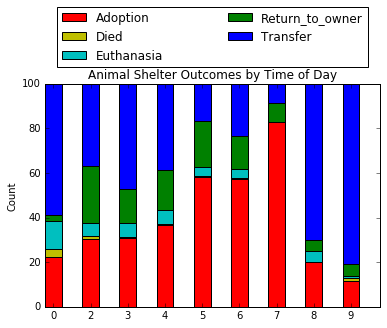

In [1378]:
from operator import add

# plot outcome depending on time of day
dataArray = {}
for outcome in animaltrain['OutcomeType'].unique():
    dataArray[outcome] = []
    for timecategory in sorted(animaltrain['Hour'].unique()):
        # for each outcome and time of day add percentage to a list
        dataArray[outcome].append(len(animaltrain.loc[(animaltrain['OutcomeType'] == outcome) & (animaltrain['Hour'] == timecategory), 'OutcomeType'])/len(animaltrain[animaltrain['Hour']==timecategory])* 100)    

width = 0.45
ind = np.arange(len(animaltrain['Hour'].unique()))

# plot in a bar plot
p1 = plt.bar(ind, dataArray['Adoption'], width, color='r', label = 'Adoption')
p2 = plt.bar(ind, dataArray['Died'], width, color='y', bottom=dataArray['Adoption'], label = 'Died')
p3 = plt.bar(ind, dataArray['Euthanasia'], width, color = 'c', bottom=np.array(dataArray['Adoption'])+np.array(dataArray['Died']), label = 'Euthanasia')
p4 = plt.bar(ind, dataArray['Return_to_owner'], width, color='g', bottom=np.array(dataArray['Adoption'])+np.array(dataArray['Died'])+np.array(dataArray['Euthanasia']), label = 'Return_to_owner')
p5 = plt.bar(ind, dataArray['Transfer'], width, color='b', bottom=np.array(dataArray['Adoption'])+np.array(dataArray['Died'])+np.array(dataArray['Euthanasia'])+np.array(dataArray['Return_to_owner']), label = 'Transfer')

plt.ylabel('Count')
plt.title('Animal Shelter Outcomes by Time of Day')
plt.xticks(ind + width/2., sorted(animaltrain['Hour'].unique()))
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=1)

plt.show()

- mostly adoptions in the afternoon and evening
- mostly transfers at night

In [1379]:
# do the same for months
# divide into month categories
def month(times):
    monthcategory = []
    for datestring in times:
        time = datestring.split(' ')[0] # split date string into date and time of day
        time = int(time.split('-')[1]) # separate month from date
        monthcategory.append(time)
        
    return monthcategory

In [1380]:
# add feature for month
animaltrain['Month'] = month(animaltrain['DateTime'])
animaltest['Month'] = month(animaltest['DateTime'])
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,Sex,Age,Agebin,Mix,NameOrNot,Hour,Month
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,365,8,1,False,5,2
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,365,8,1,False,2,10
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0,730,10,1,False,2,1


In [1381]:
# do the same for years
# divide into year categories
def year(times):
    yearcategory = []
    for datestring in times:
        time = datestring.split(' ')[0] # split date string into date and time of day
        time = int(time.split('-')[0]) # separate year from date
        yearcategory.append(time)
        
    return yearcategory

In [1383]:
# add feature for year
trainyears = year(animaltrain['DateTime'])
testyears = year(animaltest['DateTime'])
trainyears = np.array(trainyears) - min(trainyears)
testyears = np.array(testyears) - min(trainyears)
animaltrain['Year'] = trainyears
animaltest['Year'] = testyears
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,Sex,Age,Agebin,Mix,NameOrNot,Hour,Month,Year
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,365,8,1,False,5,2,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,365,8,1,False,2,10,0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0,730,10,1,False,2,1,2


#### 2.8 Outcome

In [1384]:
# Outcome Type
animaltrain['OutcomeType'].unique()

array(['Return_to_owner', 'Euthanasia', 'Adoption', 'Transfer', 'Died'], dtype=object)

In [1385]:
animaltrain['Outcome'] = animaltrain['OutcomeType'].map({'Adoption': 0, 'Died': 1, 'Euthanasia': 2, 'Return_to_owner': 3, 'Transfer': 4})

In [1386]:
animaltrain.head(3)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Type,Sex,Age,Agebin,Mix,NameOrNot,Hour,Month,Year,Outcome
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,0,0,365,8,1,False,5,2,1,3
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,1,1,365,8,1,False,2,10,0,2
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,0,0,730,10,1,False,2,1,2,0


### 3. Prediction

- Prediction using random forest classifier

In [1393]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

# split hourly data into a training set and test set -> randomly selects 10% of data as test set
train, test = train_test_split(animaltrain, test_size = 0.25)

# fit the random forest classifier
forest = RandomForestClassifier(n_estimators = 100, max_features = 5, max_depth=10, min_samples_leaf=5)
forest = forest.fit(train.values[0::, 10:animaltrain.shape[1]-1], train.values[0::, animaltrain.shape[1]-1].astype(int))
# calculate score
r_squared = forest.score(test.values[0::, 10:animaltrain.shape[1]-1], test.values[0::, animaltrain.shape[1]-1].astype(int))
r_squared

0.6739488253778243

In [1394]:
# fit the random forest classifier
forest = RandomForestClassifier(n_estimators = 100, max_features = 5, max_depth=10, min_samples_leaf=5)
forest = forest.fit(animaltrain.values[0::, 10:animaltrain.shape[1]-1], animaltrain.values[0::, animaltrain.shape[1]-1].astype(int))

In [1395]:
# predict_proba
predictions = forest.predict_proba(animaltest.values[0::, 8:animaltest.shape[1]])
predictions

array([[  4.12132382e-02,   1.88165066e-03,   7.81441160e-02,
          3.06057187e-01,   5.72703808e-01],
       [  6.22523586e-01,   2.12821364e-03,   1.15313223e-02,
          2.92716750e-01,   7.11001280e-02],
       [  5.01524965e-01,   1.01922708e-02,   6.47884101e-03,
          1.55703234e-01,   3.26100689e-01],
       ..., 
       [  3.71747212e-05,   8.47035748e-03,   8.32746609e-02,
          3.38714882e-04,   9.07879092e-01],
       [  3.72572362e-01,   1.66144886e-03,   3.23880129e-02,
          4.76206158e-01,   1.17172018e-01],
       [  3.96654828e-02,   5.17637907e-04,   2.07422464e-01,
          4.83403415e-01,   2.68991000e-01]])

In [1396]:
data = {'ID': animaltest['ID'], 'Adoption': predictions[0::, 0], 'Died': predictions[0::, 1], 'Euthanasia': predictions[0::, 2], 'Return_to_owner': predictions[0::, 3], 'Transfer': predictions[0::, 4]}
outputdf = pd.DataFrame(data, columns = ['ID', 'Adoption', 'Died', 'Euthanasia', 'Return_to_owner', 'Transfer'])

In [1397]:
outputdf.to_csv('AnimalPredictions.csv', index=False)

In [5]:
data = [[] for x in range(3)]
data

[[], [], []]